In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import web_scraping as ws
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%config InlineBackend.figure_format = 'png'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [ ]:
is_genre_cols = ['is_Action', 'is_Adventure',
                 'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama',
                 'is_Family', 'is_Fantasy', 'is_History', 'is_Horror', 'is_Music',
                 'is_Musical', 'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi',
                 'is_Sport', 'is_Thriller', 'is_War', 'is_Western']

In [387]:
main_features = ['runtime_minutes', 'budget', 'years_since_release',
                 'imdb_user_rating', 'imdb_user_rating_count', 'oscar_wins',
                 'non_oscar_wins', 'metascore']

main_features_2 = ['runtime_minutes', 'budget',
                   'imdb_user_rating', 'imdb_user_rating_count',
                   'oscar_wins', 'non_oscar_wins', 'metascore', 'years_since_release',
                   'is_golden_week_release', 'is_summer_release',
                   'is_xmas_release']

main_features_3 = ['budget',
                   'imdb_user_rating', 'imdb_user_rating_count',
                   'oscar_wins', 'non_oscar_wins', 'years_since_release',
                   'is_golden_week_release', 'is_summer_release',
                   'is_xmas_release']


main_features_4 = ['budget',
                   'imdb_user_rating', 'imdb_user_rating_count',
                   'oscar_wins', 'non_oscar_wins', 'years_since_release',
                   'is_golden_week_release', 'is_summer_release',
                   'is_xmas_release', 'budget * is_golden_week_release',
                   'budget * is_summer_release', 'budget * is_xmas_release']

main_features_5_japan = ['budget',
                         'imdb_user_rating', 'imdb_user_rating_count',
                         'non_oscar_wins', 'years_since_release',
                         'is_golden_week_release', 'is_summer_release',
                         'is_xmas_release']

main_features_5_usa = ['budget',
                       'imdb_user_rating', 'imdb_user_rating_count',
                       'oscar_wins', 'years_since_release',
                       'is_golden_week_release', 'is_summer_release',
                       'is_xmas_release', 'budget * is_golden_week_release',
                       'budget * is_summer_release', 'budget * is_xmas_release']

main_features_6_usa = ['budget', 'imdb_user_rating', 'imdb_user_rating**2',
                       'imdb_user_rating_count', 'oscar_wins',
                       'years_since_release', 'years_since_release**2',
                       'is_summer_release', 'is_xmas_release',
                       'budget * is_summer_release', 'budget * is_xmas_release']

main_features_6_japan = ['budget', 'imdb_user_rating', 'imdb_user_rating**2',
                         'imdb_user_rating_count', 'non_oscar_wins',
                         'years_since_release', 'years_since_release**2',
                         'is_golden_week_release', 'is_summer_release',
                         'is_xmas_release']

all_usa_features = ['runtime_minutes', 'budget',
                    'imdb_user_rating', 'imdb_user_rating_count',
                    'oscar_wins', 'non_oscar_wins', 'metascore', 'years_since_release',
                    'is_golden_week_release', 'is_summer_release',
                    'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
                    'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
                    'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
                    'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
                    'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'Other', 'PG',
                    'PG-13', 'R']

all_japan_features = ['runtime_minutes', 'budget',
                      'imdb_user_rating', 'imdb_user_rating_count',
                      'oscar_wins', 'non_oscar_wins', 'metascore', 'years_since_release',
                      'is_golden_week_release', 'is_summer_release',
                      'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
                      'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
                      'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
                      'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
                      'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'PG', 'PG-13', 'R',
                      'TV-MA', 'TV-PG']

target = ['global_gross']

main_features_target = main_features + target

In [381]:
japan_df.head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG,budget * is_golden_week_release,budget * is_summer_release,budget * is_xmas_release,imdb_user_rating**2,years_since_release**2
0,Psycho Pass 3: First Inspector,Japan,135.0,1.03e+07,7.57e+05,No Rating,"[Animation, Sci-Fi]",7.6,187.0,0.0,0.0,71.0,2020-03-27,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,57.76,0.0
1,Gekijôban Shirobako,Japan,119.0,1.03e+07,2.59e+06,No Rating,"[Animation, Comedy, Drama]",6.4,16.0,0.0,0.0,71.0,2020-02-29,0.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,40.96,0.0
2,Digimon Adventure: Last Evolution Kizuna,Japan,65.0,1.03e+07,3.97e+06,No Rating,"[Animation, Action, Adventure, Sci-Fi, Thriller]",7.3,209.0,0.0,0.0,71.0,2020-02-21,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0,53.29,0.0
3,High School Fleet the Movie,Japan,105.0,1.03e+07,6.09e+05,No Rating,"[Animation, Action, Adventure, Comedy, Drama]",6.1,12.0,0.0,0.0,71.0,2020-01-18,0.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,37.21,0.0
4,Made in Abyss: Dawn of the Deep Soul,Japan,113.0,1.03e+07,4.91e+06,No Rating,"[Animation, Adventure, Fantasy, Mystery, Sci-F...",8.1,163.0,0.0,0.0,71.0,2020-01-17,0.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0,65.61,0.0


In [379]:
usa_df['imdb_user_rating**2'] = usa_df['imdb_user_rating']**2
usa_df['years_since_release**2'] = usa_df['years_since_release']**2

japan_df['imdb_user_rating**2'] = japan_df['imdb_user_rating']**2
japan_df['years_since_release**2'] = japan_df['years_since_release']**2

In [351]:
usa_df['budget * is_golden_week_release'] = usa_df['budget'] * usa_df['is_golden_week_release']
usa_df['budget * is_summer_release'] = usa_df['budget'] * usa_df['is_summer_release']
usa_df['budget * is_xmas_release'] = usa_df['budget'] * usa_df['is_xmas_release']

japan_df['budget * is_golden_week_release'] = japan_df['budget'] * japan_df['is_golden_week_release']
japan_df['budget * is_summer_release'] = japan_df['budget'] * japan_df['is_summer_release']
japan_df['budget * is_xmas_release'] = japan_df['budget'] * japan_df['is_xmas_release']

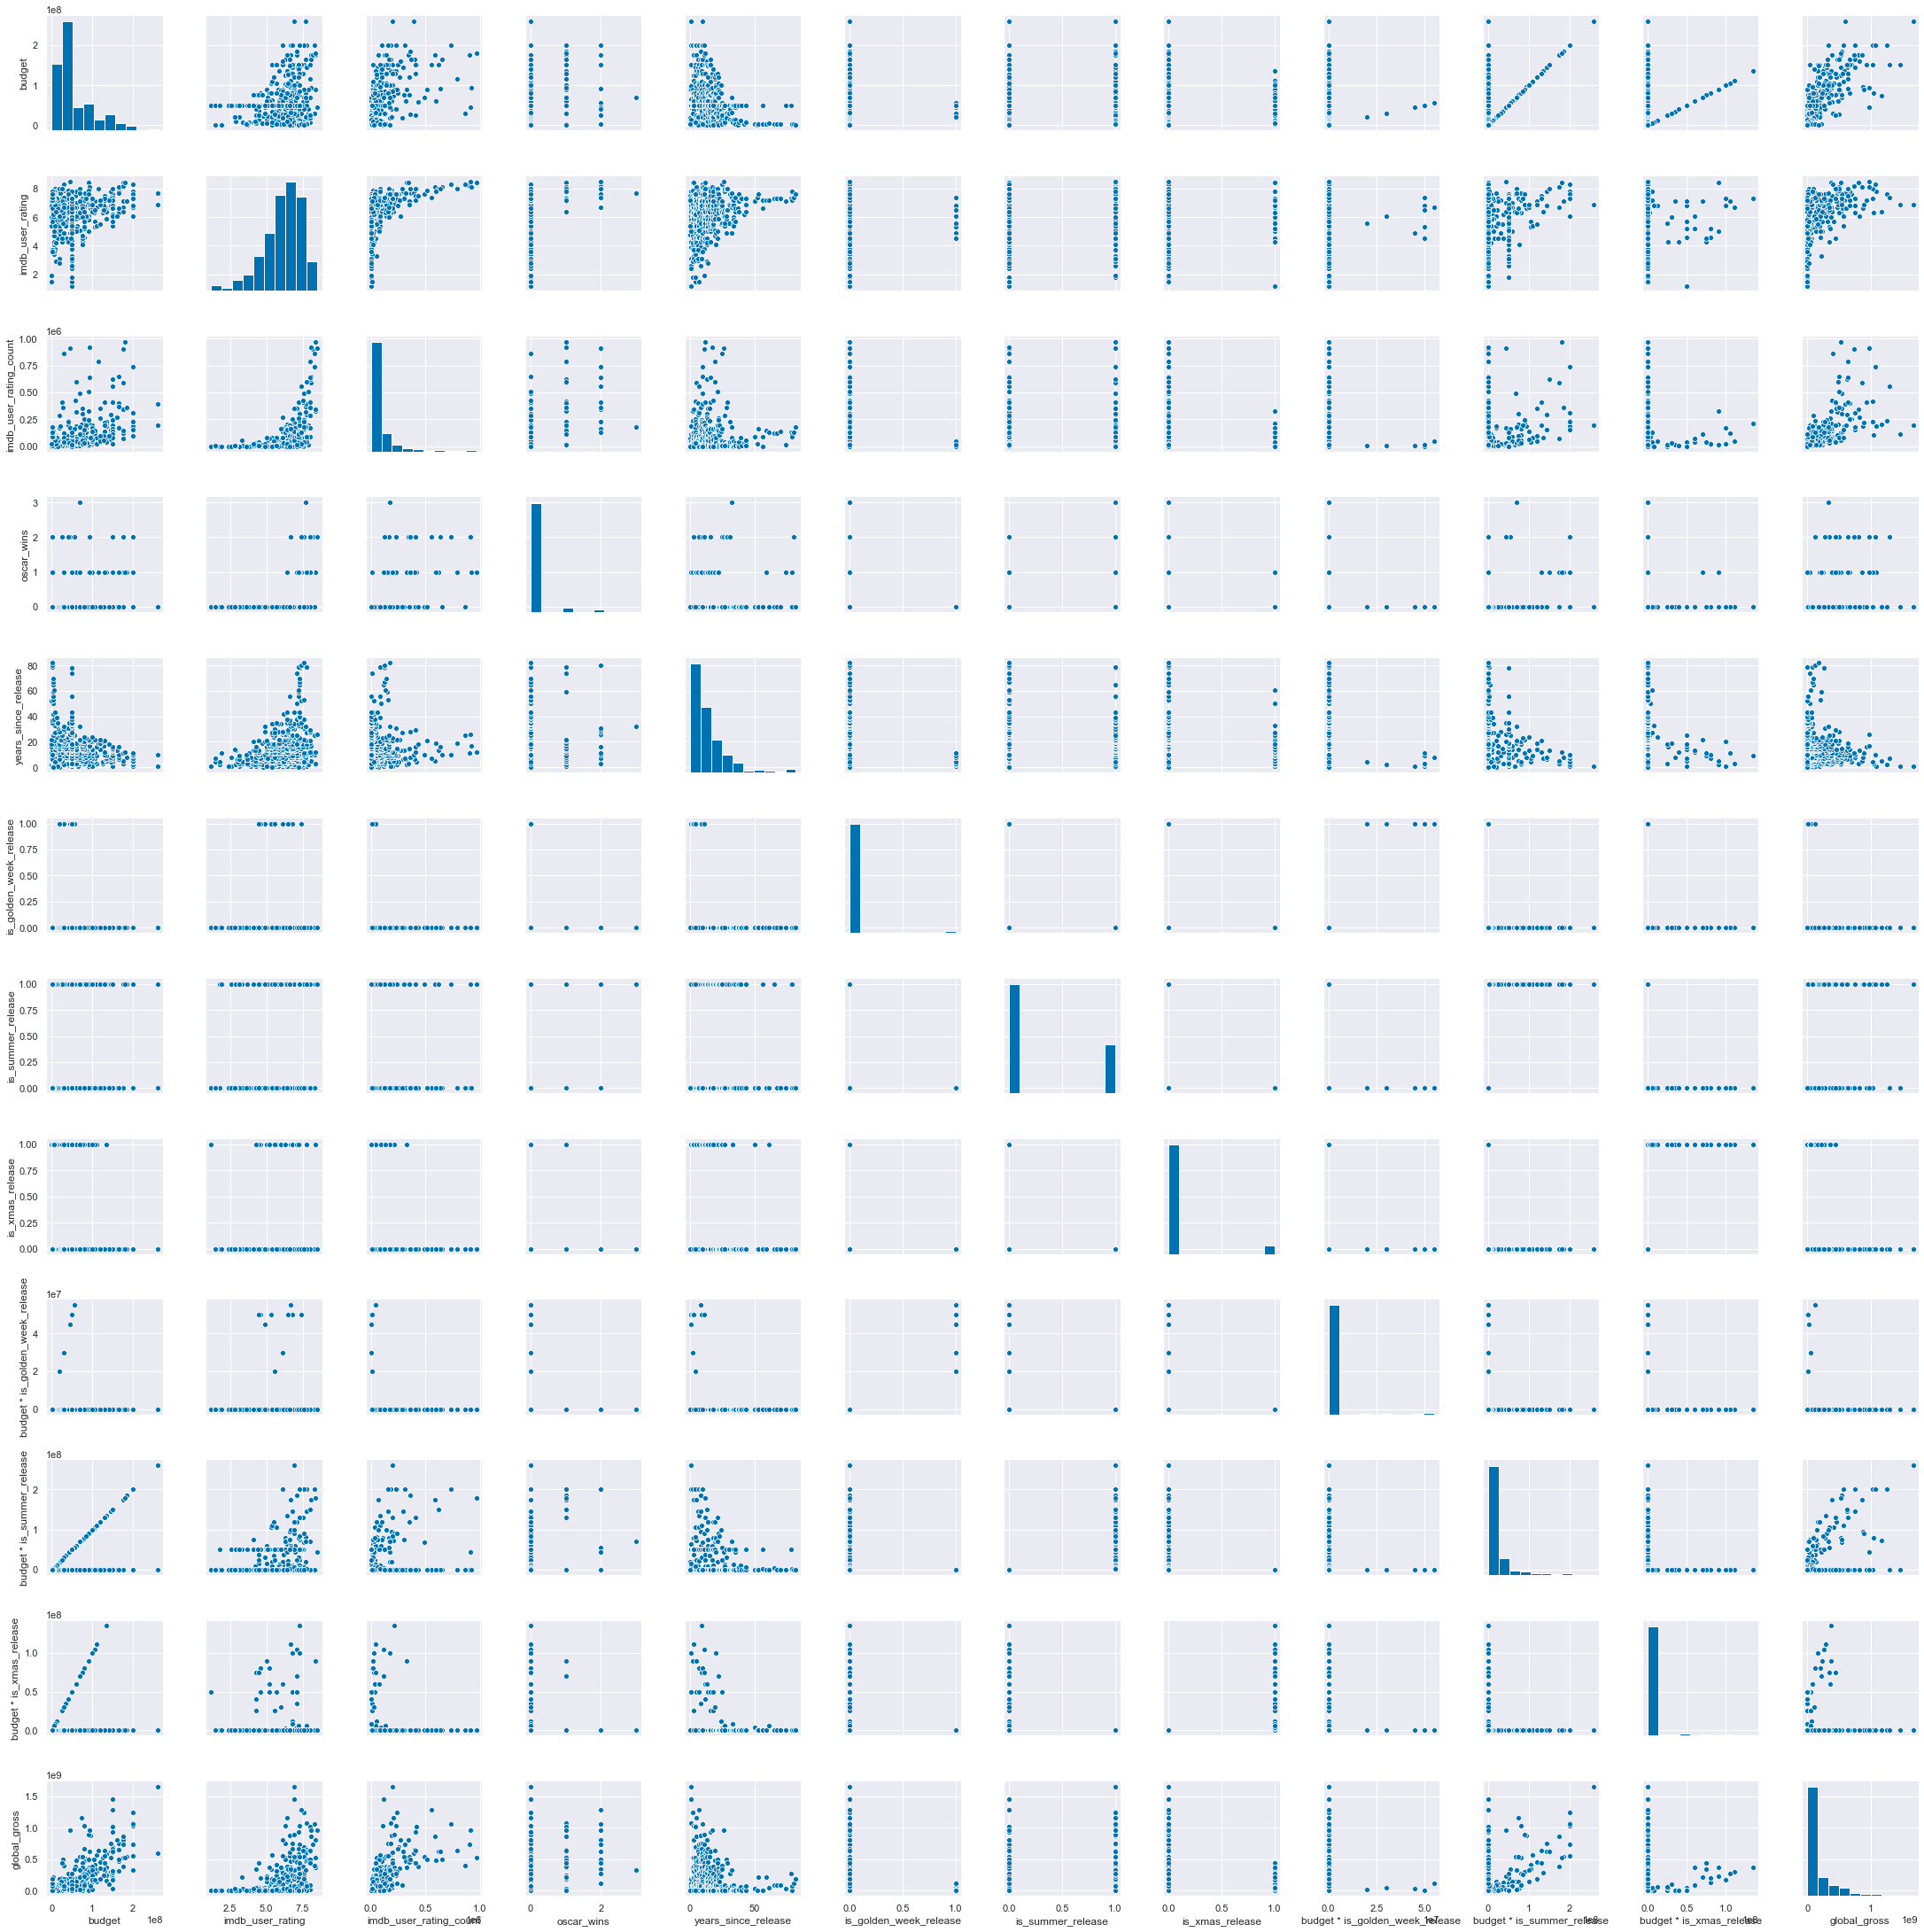

In [377]:
sns.pairplot(usa_df[main_features_5_usa+target])

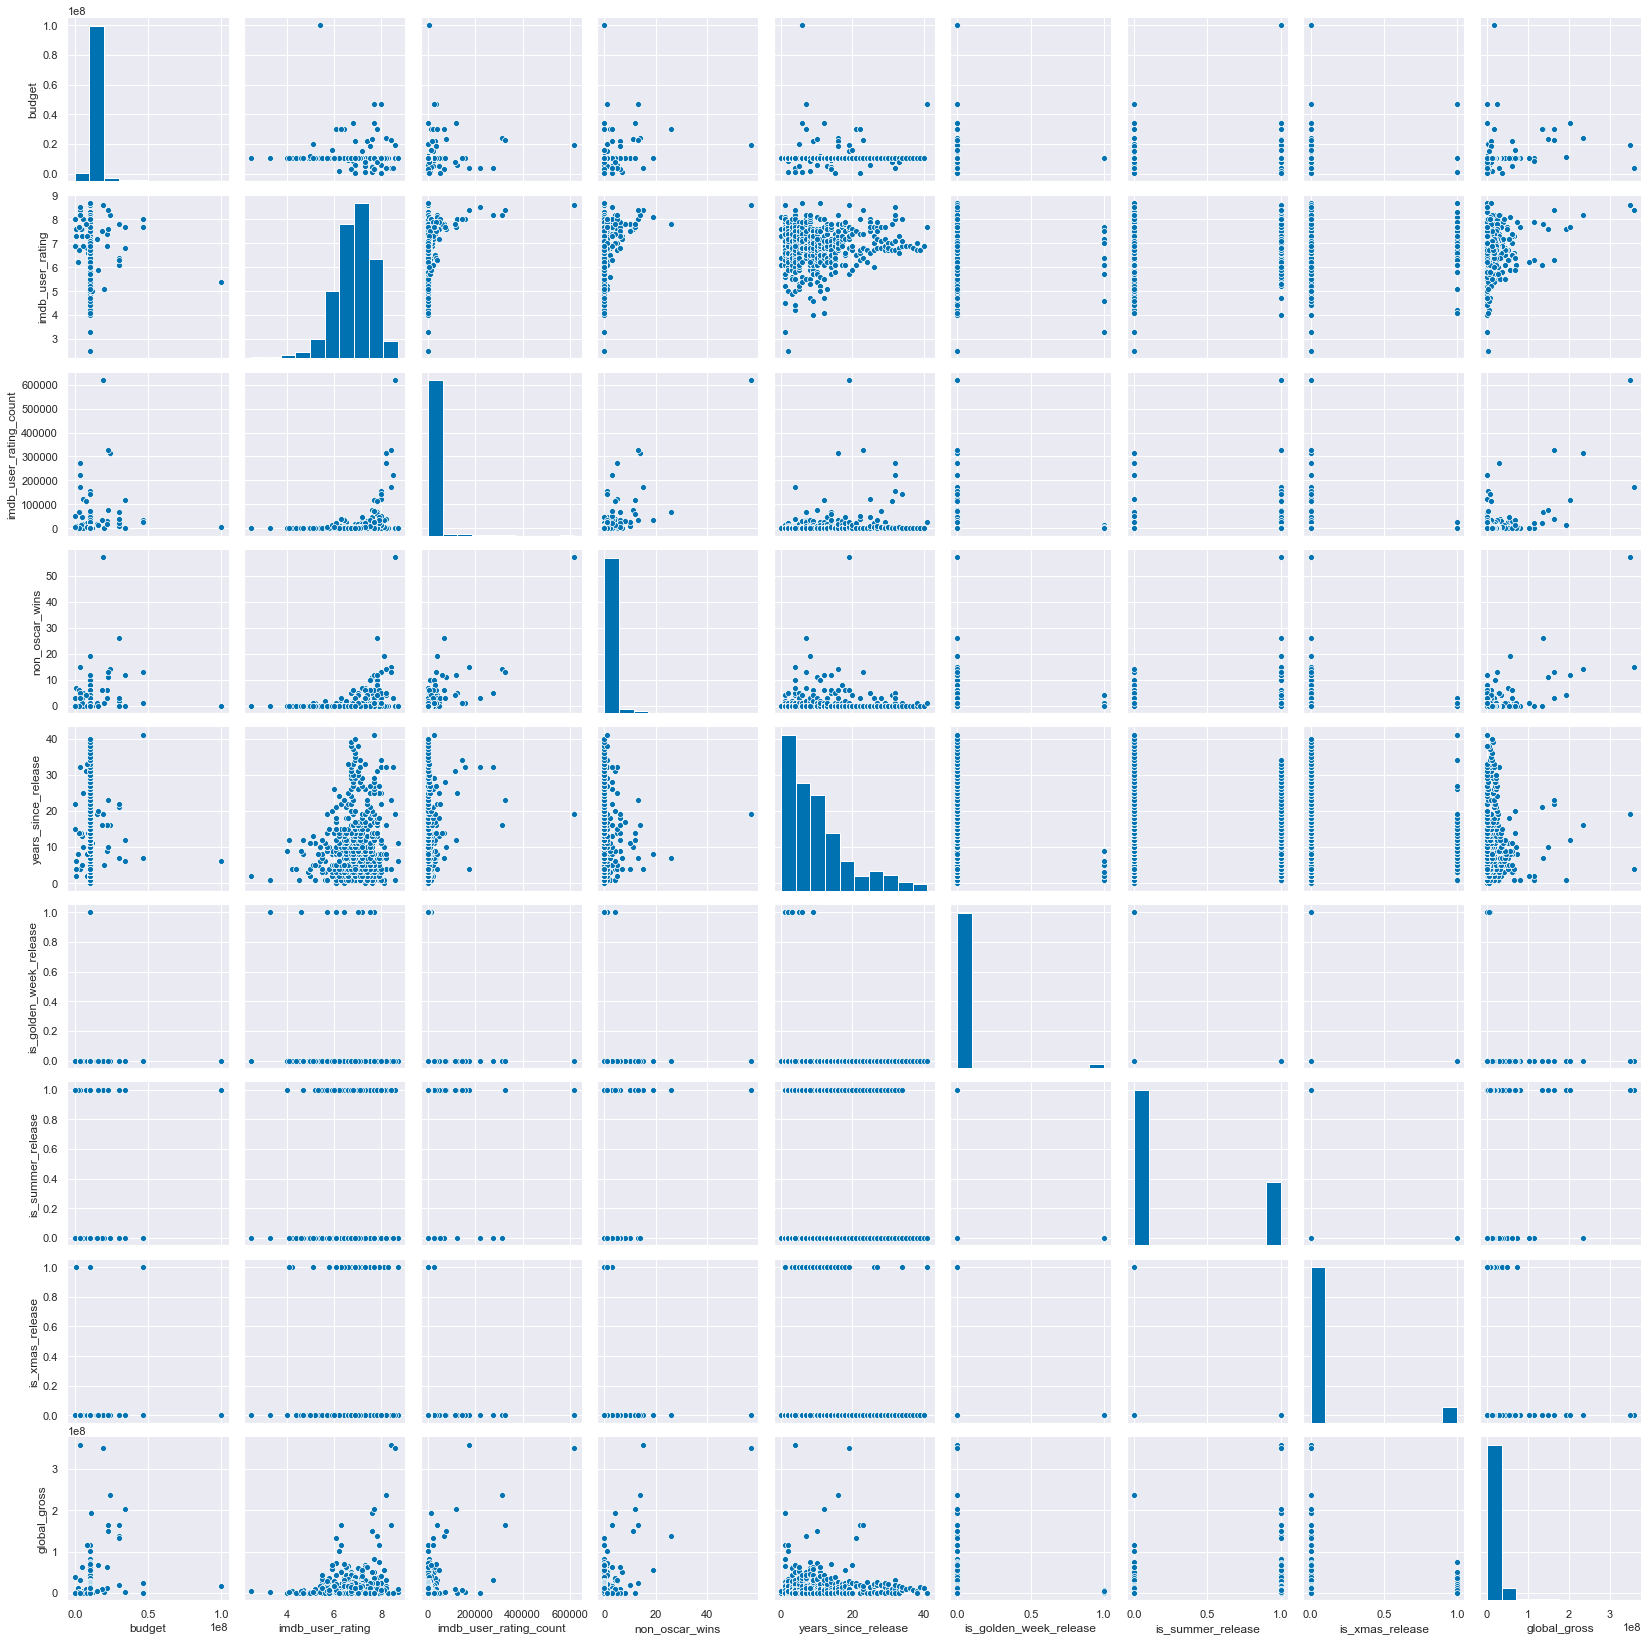

In [378]:
sns.pairplot(japan_df[main_features_5_japan+target])

In [357]:
japan_df.columns

Index(['title', 'country', 'runtime_minutes', 'budget', 'global_gross',
       'mpaa_rating', 'genres', 'imdb_user_rating', 'imdb_user_rating_count',
       'oscar_wins', 'non_oscar_wins', 'metascore', 'release_date',
       'years_since_release', 'is_golden_week_release', 'is_summer_release',
       'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
       'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
       'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
       'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
       'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'PG', 'PG-13', 'R',
       'TV-MA', 'TV-PG', 'budget * is_golden_week_release',
       'budget * is_summer_release', 'budget * is_xmas_release'],
      dtype='object')

In [184]:
japan_df.columns

Index(['title', 'country', 'runtime_minutes', 'budget', 'global_gross',
       'mpaa_rating', 'genres', 'imdb_user_rating', 'imdb_user_rating_count',
       'oscar_wins', 'non_oscar_wins', 'metascore', 'release_date',
       'years_since_release', 'is_golden_week_release', 'is_summer_release',
       'is_xmas_release', 'is_Action', 'is_Adventure', 'is_Animation',
       'is_Biography', 'is_Comedy', 'is_Crime', 'is_Drama', 'is_Family',
       'is_Fantasy', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
       'is_Mystery', 'is_News', 'is_Romance', 'is_Sci-Fi', 'is_Sport',
       'is_Thriller', 'is_War', 'is_Western', 'No Rating', 'PG', 'PG-13', 'R',
       'TV-MA', 'TV-PG'],
      dtype='object')

In [ ]:
# Put in feature_engineering module

def create_genre_encodings(df, unique_genres):
    for genre in unique_genres:
        df['is_' + genre] = df.apply(lambda x: genre in x['genres'], axis=1).astype(int)

In [383]:
with open('cleaned_usa_df_4.pickle', 'wb') as to_write:
    pickle.dump(usa_df, to_write)

In [382]:
with open('cleaned_japan_df_4.pickle', 'wb') as to_write:
    pickle.dump(japan_df, to_write)

In [4]:
with open('cleaned_usa_df.pickle', 'rb') as read_file:
    usa_df = pickle.load(read_file)

In [6]:
with open('cleaned_japan_df.pickle', 'rb') as read_file:
    japan_df = pickle.load(read_file)

In [160]:
usa_df.head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,Other,PG,PG-13,R
0,Trolls World Tour,USA,90.0,9.00e+07,5.12e+06,PG,"[Animation, Adventure, Comedy, Family, Fantasy...",6.1,9669.0,0.0,0.0,51.0,2020-04-10,0.0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Onward,USA,102.0,5.00e+07,1.06e+08,PG,"[Animation, Adventure, Comedy, Family, Fantasy]",7.5,69850.0,0.0,2.0,61.0,2020-03-06,0.0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Spies in Disguise,USA,102.0,1.00e+08,1.72e+08,PG,"[Animation, Adventure, Comedy, Family, Sci-Fi]",6.8,25693.0,0.0,0.0,54.0,2019-12-25,1.0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,Elfland,USA,87.0,5.00e+07,4.31e+04,No Rating,[Animation],1.2,11.0,0.0,0.0,61.0,2019-12-03,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Go Fish,USA,75.0,5.00e+07,1.85e+05,PG,"[Animation, Adventure]",4.3,66.0,0.0,0.0,61.0,2019-11-19,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [136]:
usa_df['mpaa_rating'].value_counts()

PG           228
G            138
No Rating     74
PG-13         17
R             13
Other          4
Name: mpaa_rating, dtype: int64

In [151]:
usa_df = usa_df.join(usa_df_mpaa_rating_dummies)

In [155]:
japan_df = japan_df.join(japan_df_mpaa_rating_dummies)

In [156]:
japan_df.head()

,title,country,runtime_minutes,budget,global_gross,mpaa_rating,genres,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,release_date,years_since_release,is_golden_week_release,is_summer_release,is_xmas_release,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Drama,is_Family,is_Fantasy,is_History,is_Horror,is_Music,is_Musical,is_Mystery,is_News,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,No Rating,PG,PG-13,R,TV-MA,TV-PG
0,Psycho Pass 3: First Inspector,Japan,135.0,1.03e+07,7.57e+05,No Rating,"[Animation, Sci-Fi]",7.6,187.0,0.0,0.0,71.0,2020-03-27,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Gekijôban Shirobako,Japan,119.0,1.03e+07,2.59e+06,No Rating,"[Animation, Comedy, Drama]",6.4,16.0,0.0,0.0,71.0,2020-02-29,0.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Digimon Adventure: Last Evolution Kizuna,Japan,65.0,1.03e+07,3.97e+06,No Rating,"[Animation, Action, Adventure, Sci-Fi, Thriller]",7.3,209.0,0.0,0.0,71.0,2020-02-21,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,High School Fleet the Movie,Japan,105.0,1.03e+07,6.09e+05,No Rating,"[Animation, Action, Adventure, Comedy, Drama]",6.1,12.0,0.0,0.0,71.0,2020-01-18,0.0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Made in Abyss: Dawn of the Deep Soul,Japan,113.0,1.03e+07,4.91e+06,No Rating,"[Animation, Adventure, Fantasy, Mystery, Sci-F...",8.1,163.0,0.0,0.0,71.0,2020-01-17,0.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [140]:
usa_df.reset_index(inplace=True, drop=True)
japan_df.reset_index(inplace=True, drop=True)

In [133]:
usa_df.loc[(usa_df['mpaa_rating'] == 'TV-PG') | (usa_df['mpaa_rating'] == 'TV-MA'), 'mpaa_rating']

In [150]:
japan_df_mpaa_rating_dummies = pd.get_dummies(japan_df['mpaa_rating'], drop_first=True)

In [148]:
usa_df_mpaa_rating_dummies = pd.get_dummies(usa_df['mpaa_rating'], drop_first=True)

In [11]:
usa_df[main_features_target].corr()
japan_df[main_features_target].corr()

,runtime_minutes,budget,years_since_release,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.45,-0.17,0.23,0.33,0.19,0.34,0.06,0.45
budget,0.45,1.00,-0.24,0.27,0.49,0.19,0.36,0.11,0.72
years_since_release,-0.17,-0.24,1.00,0.29,0.08,0.17,-0.03,0.25,-0.10
imdb_user_rating,0.23,0.27,0.29,1.00,0.51,0.30,0.42,0.49,0.39
imdb_user_rating_count,0.33,0.49,0.08,0.51,1.00,0.57,0.72,0.48,0.71
oscar_wins,0.19,0.19,0.17,0.30,0.57,1.00,0.65,0.40,0.39
non_oscar_wins,0.34,0.36,-0.03,0.42,0.72,0.65,1.00,0.47,0.52
metascore,0.06,0.11,0.25,0.49,0.48,0.40,0.47,1.00,0.22
global_gross,0.45,0.72,-0.10,0.39,0.71,0.39,0.52,0.22,1.00


,runtime_minutes,budget,years_since_release,imdb_user_rating,imdb_user_rating_count,oscar_wins,non_oscar_wins,metascore,global_gross
runtime_minutes,1.00,0.09,-0.13,0.15,0.14,0.07,0.19,0.03,0.18
budget,0.09,1.00,0.04,-0.04,0.13,0.07,0.20,-0.01,0.21
years_since_release,-0.13,0.04,1.00,0.14,0.22,0.05,0.07,0.02,0.04
imdb_user_rating,0.15,-0.04,0.14,1.00,0.29,0.10,0.27,0.16,0.15
imdb_user_rating_count,0.14,0.13,0.22,0.29,1.00,0.66,0.77,0.32,0.62
oscar_wins,0.07,0.07,0.05,0.10,0.66,1.00,0.72,0.21,0.44
non_oscar_wins,0.19,0.20,0.07,0.27,0.77,0.72,1.00,0.29,0.62
metascore,0.03,-0.01,0.02,0.16,0.32,0.21,0.29,1.00,0.07
global_gross,0.18,0.21,0.04,0.15,0.62,0.44,0.62,0.07,1.00


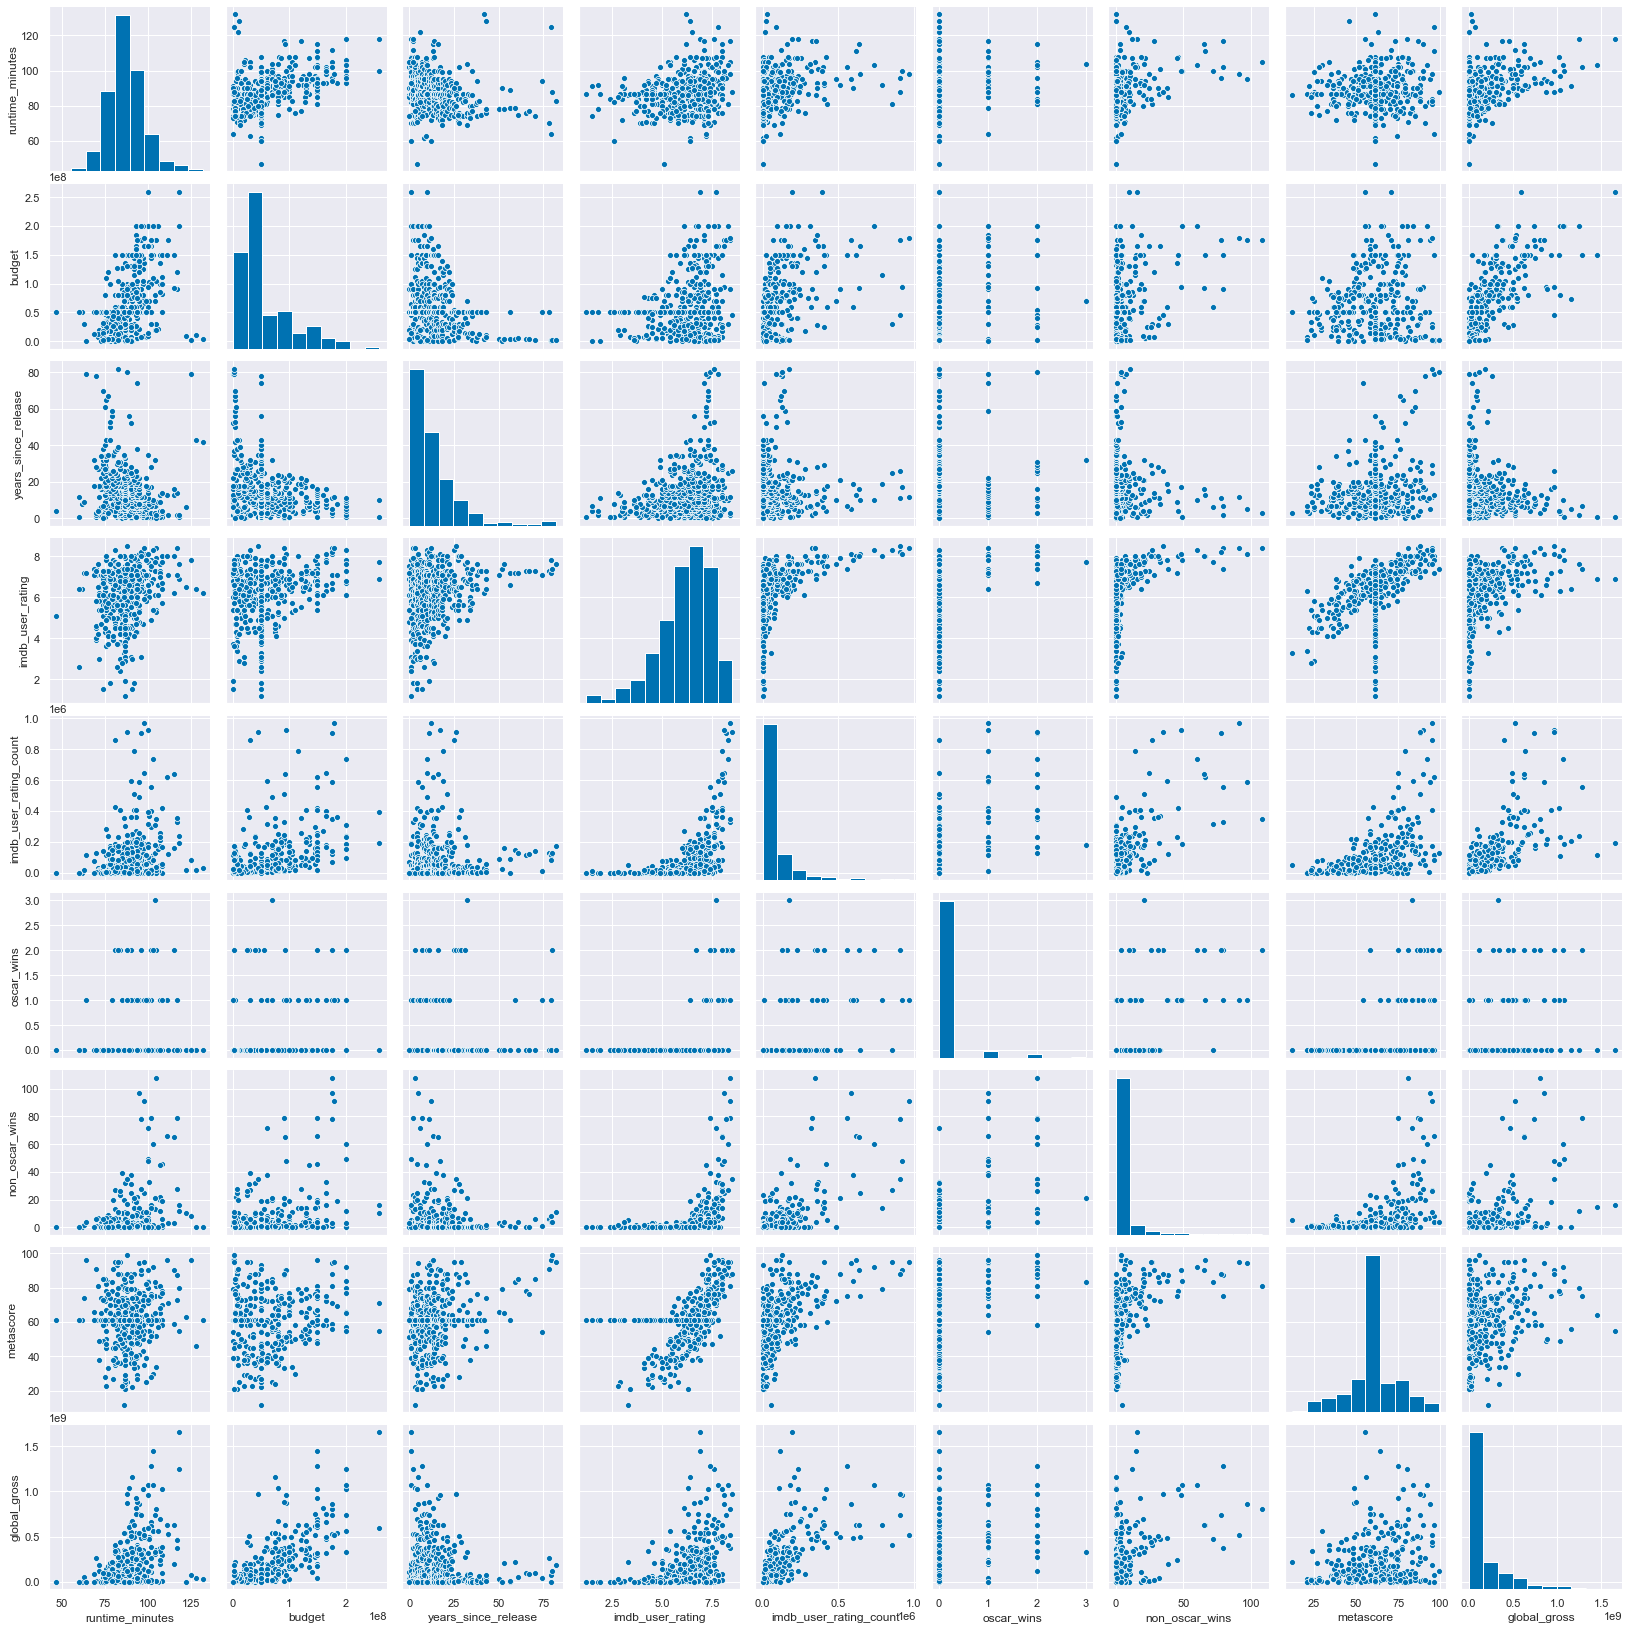

In [12]:
sns.pairplot(usa_df[main_features_target]);

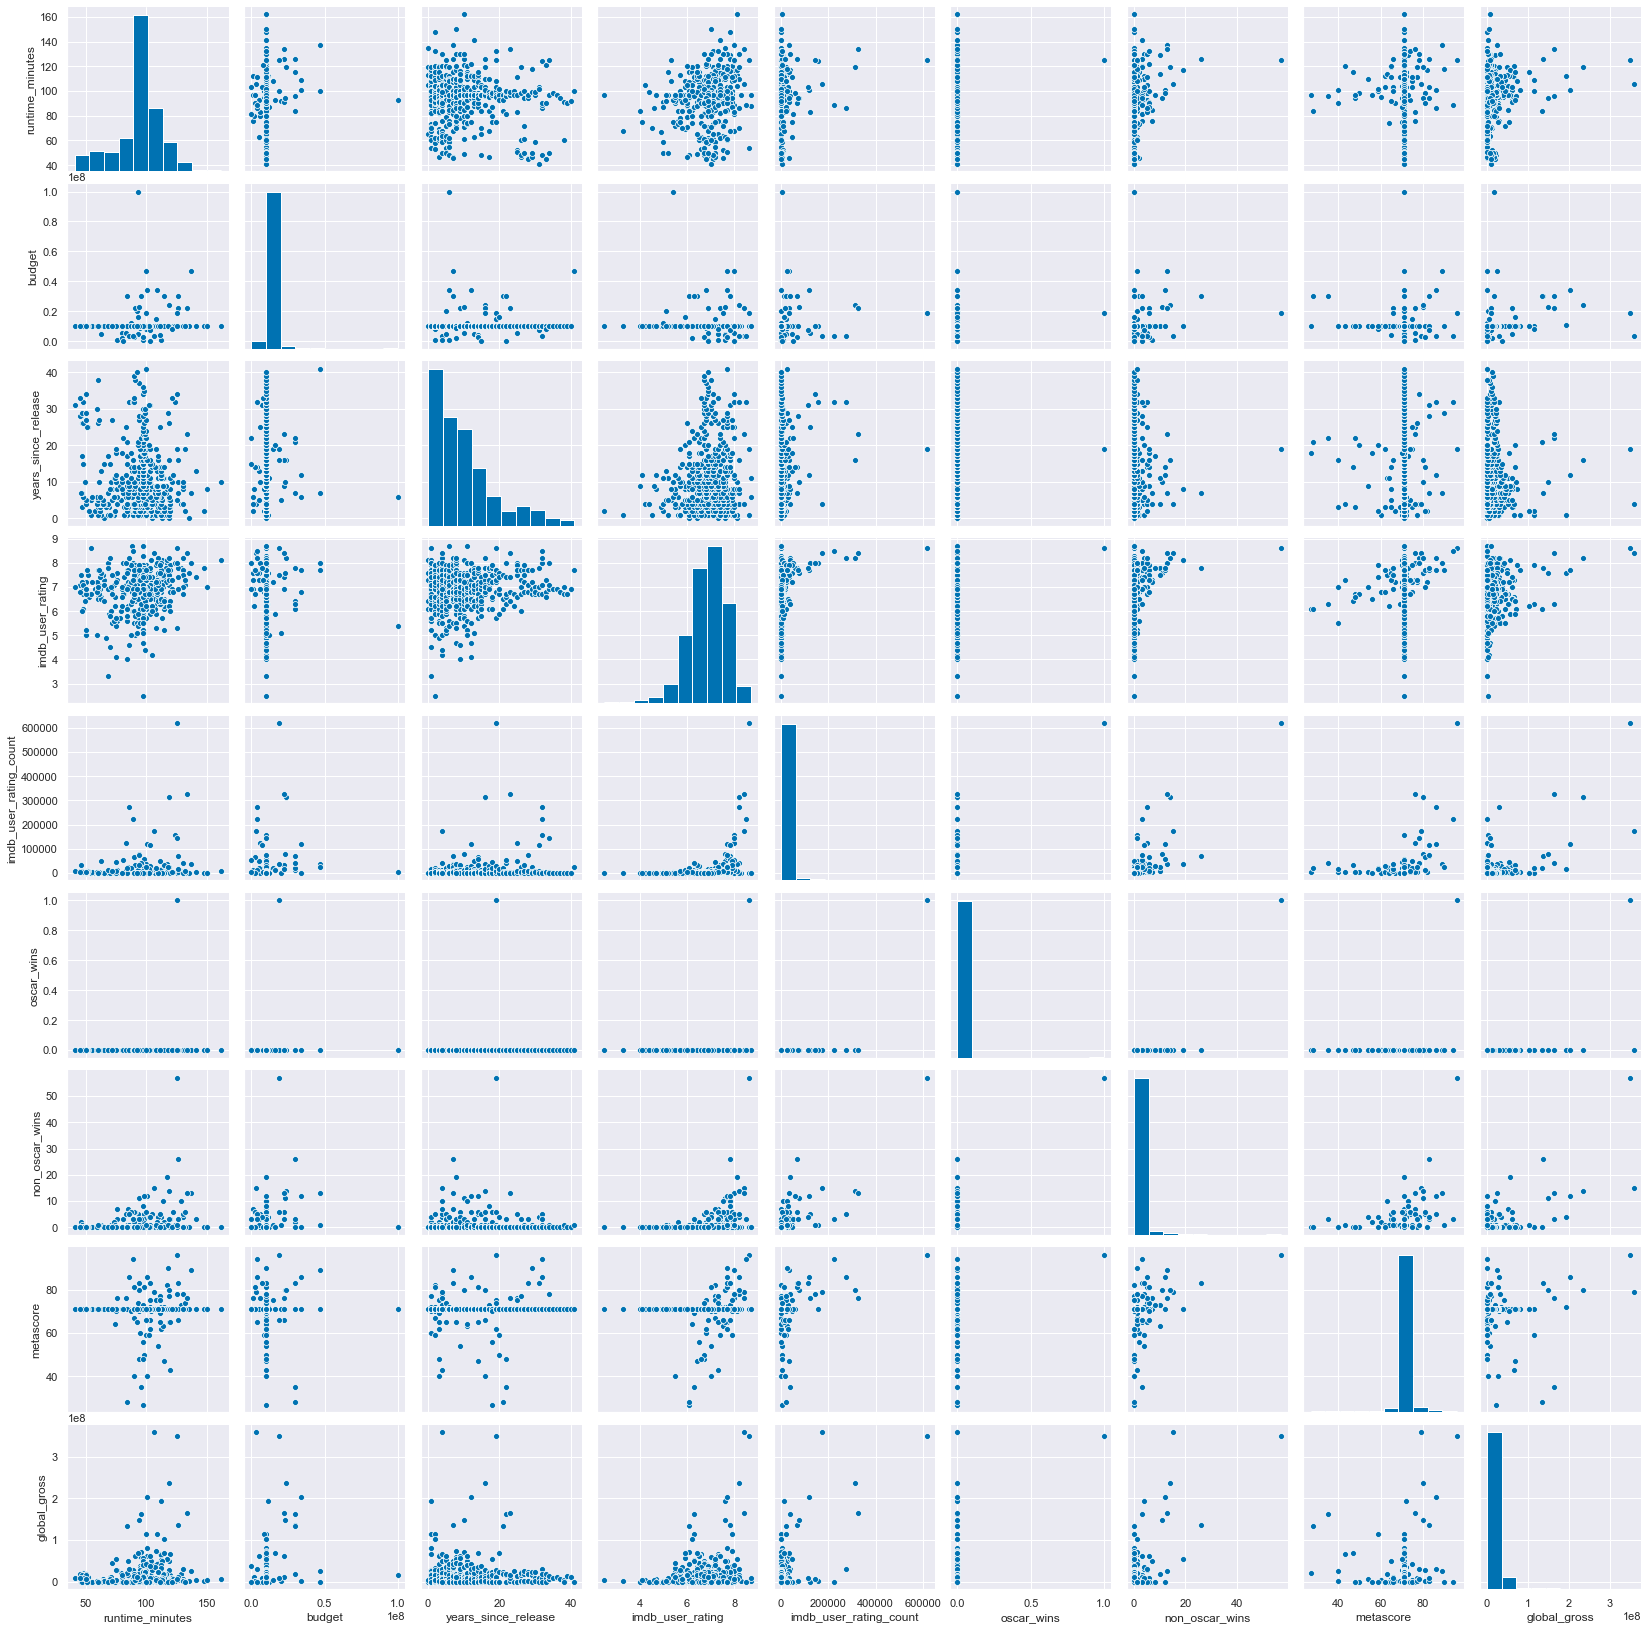

In [14]:
sns.pairplot(japan_df[main_features_target]);

In [244]:
usa_X_all.shape

(474, 37)

In [201]:
usa_X = usa_df.loc[:, main_features]

usa_y = usa_df[target]

japan_X = japan_df.loc[:, main_features]

japan_y = japan_df[target]

In [212]:
usa_X_all = usa_df.loc[:, all_usa_features]

japan_X_all = japan_df.loc[:, all_japan_features]

In [293]:
usa_X_2 = usa_df.loc[:, main_features_2]

japan_X_2 = japan_df.loc[:, main_features_2]

In [346]:
usa_X_3 = usa_df.loc[:, main_features_3]

japan_X_3 = japan_df.loc[:, main_features_3]

usa_X_train_val_4, usa_X_test_4, usa_y_train_val_4, usa_y_test_4 = initial_split(usa_X_3, usa_y)

japan_X_train_val_4, japan_X_test_4, japan_y_train_val_4, japan_y_test_4 = initial_split(japan_X_3, japan_y)

In [361]:
usa_X_4 = usa_df.loc[:, main_features_4]

japan_X_4 = japan_df.loc[:, main_features_4]

usa_X_train_val_5, usa_X_test_5, usa_y_train_val_5, usa_y_test_5 = initial_split(usa_X_4, usa_y)

japan_X_train_val_5, japan_X_test_5, japan_y_train_val_5, japan_y_test_5 = initial_split(japan_X_4, japan_y)

In [371]:
usa_X_5 = usa_df.loc[:, main_features_5_usa]

japan_X_5 = japan_df.loc[:, main_features_5_japan]

usa_X_train_val_6, usa_X_test_6, usa_y_train_val_6, usa_y_test_6 = initial_split(usa_X_5, usa_y)

japan_X_train_val_6, japan_X_test_6, japan_y_train_val_6, japan_y_test_6 = initial_split(japan_X_5, japan_y)

In [388]:
usa_X_6 = usa_df.loc[:, main_features_6_usa]

japan_X_6 = japan_df.loc[:, main_features_6_japan]

usa_X_train_val_7, usa_X_test_7, usa_y_train_val_7, usa_y_test_7 = initial_split(usa_X_6, usa_y)

japan_X_train_val_7, japan_X_test_7, japan_y_train_val_7, japan_y_test_7 = initial_split(japan_X_6, japan_y)

In [42]:
usa_X_train_val, usa_X_test, usa_y_train_val, usa_y_test = initial_split(usa_X, usa_y)

japan_X_train_val, japan_X_test, japan_y_train_val, japan_y_test = initial_split(japan_X, japan_y)

In [213]:
usa_X_train_val_2, usa_X_test_2, usa_y_train_val_2, usa_y_test_2 = initial_split(usa_X_all, usa_y)

japan_X_train_val_2, japan_X_test_2, japan_y_train_val_2, japan_y_test_2 = initial_split(japan_X_all, japan_y)

In [295]:
usa_X_train_val_3, usa_X_test_3, usa_y_train_val_3, usa_y_test_3 = initial_split(usa_X_2, usa_y)

japan_X_train_val_3, japan_X_test_3, japan_y_train_val_3, japan_y_test_3 = initial_split(japan_X_2, japan_y)

In [288]:
p_usa = PolynomialFeatures(degree=2)
p_japan = PolynomialFeatures(degree=2)
usa_X_train_val_2_poly = p_usa.fit_transform(usa_X_train_val_2)
japan_X_train_val_2_poly = p_japan.fit_transform(japan_X_train_val_2)

In [300]:
p_usa_main = PolynomialFeatures(degree=2)
p_japan_main = PolynomialFeatures(degree=2)
usa_X_train_val_poly = p_usa_main.fit_transform(usa_X_train_val_3)
japan_X_train_val_poly = p_japan_main.fit_transform(japan_X_train_val_3)

In [299]:
usa_X_train_val_3.shape

(379, 11)

In [301]:
len(p_usa_main.get_feature_names())
len(p_japan_main.get_feature_names())

78

78

In [305]:
s_usa_2 = StandardScaler(with_mean=False)
s_japan_2 = StandardScaler(with_mean=False)
usa_X_train_val_poly_standard = s_usa_2.fit_transform(usa_X_train_val_poly)
japan_X_train_val_poly_standard = s_japan_2.fit_transform(japan_X_train_val_poly)

In [277]:
usa_X_train_val_2_poly_standard.shape

(379, 741)

In [268]:
usa_y_train_val_2.values.ravel()

array([3.73993951e+08, 1.40073390e+08, 8.57611174e+08, 2.06272000e+05,
       2.00811689e+08, 7.19060000e+04, 3.49822765e+08, 1.64264710e+07,
       4.88700000e+04, 1.43325970e+08, 8.13367380e+08, 7.64114010e+07,
       6.94782000e+05, 4.94878759e+08, 1.19559110e+08, 1.06089121e+08,
       2.16026182e+08, 1.07339459e+09, 2.89461270e+07, 7.63220000e+04,
       1.78281554e+08, 5.21170825e+08, 1.10289000e+05, 5.59532700e+06,
       3.73515621e+08, 3.48840316e+08, 2.12886920e+07, 5.87837200e+06,
       2.27839780e+07, 7.46921274e+08, 1.45358062e+08, 3.98391200e+06,
       5.59852396e+08, 5.05072670e+07, 6.49196900e+06, 4.98781117e+08,
       4.64710230e+07, 7.12158690e+07, 1.03291131e+08, 5.52504960e+07,
       6.98659240e+07, 1.28080228e+09, 2.46043310e+07, 7.49391890e+07,
       5.71000000e+04, 3.80857780e+07, 5.29323962e+08, 8.74046510e+07,
       7.41513460e+07, 6.21537519e+08, 1.24280536e+09, 2.71000270e+07,
       8.86686817e+08, 1.57768000e+05, 1.92306508e+08, 2.67045765e+08,
      

In [332]:
alpha_vec = 10**np.linspace(-2, 2, 200)

lasso_model_usa = LassoCV(alphas=alpha_vec, cv=5, max_iter=10000)
lasso_model_japan = LassoCV(alphas=alpha_vec, cv=5, max_iter=10000)

ridge_model_usa = RidgeCV(alphas=alpha_vec, cv=5)
ridge_model_japan = RidgeCV(alphas=alpha_vec, cv=5)

In [250]:
len(s_usa.scale_)
len(s_japan.scale_)

741

780

In [232]:
usa_X_train_val_2.shape
usa_X_train_val_2_poly.shape

(379, 37)

(379, 741)

In [234]:
len(p_usa.get_feature_names())
len(p_japan.get_feature_names())

741

780

In [233]:
japan_X_train_val_2.shape
japan_X_train_val_2_poly.shape

(396, 38)

(396, 780)

In [391]:
cv(usa_X_train_val_7, usa_y_train_val_7)

[0.71232741 0.69694994 0.70052943 0.73876184 0.69759899]
Mean train R^2:      0.709 

[0.67363416 0.76603311 0.7214375  0.60849765 0.71735513]
Mean val R^2:        0.697


In [392]:
cv(japan_X_train_val_7, japan_y_train_val_7)

[0.42213445 0.47536595 0.5189825  0.51437965 0.6137218 ]
Mean train R^2:      0.509 

[ 0.61979237  0.55189546 -0.27844198  0.33364454  0.14375738]
Mean val R^2:        0.274


In [389]:
split_and_simple_validate(usa_X_train_val_7, usa_y_train_val_7)

Training R^2 score:       0.713
Validation R^2 score:     0.673
Intercept:                -256366194.95454937

Feature coefficients: 

budget                    2.13
imdb_user_rating          82688612.22
imdb_user_rating**2       -6549076.67
imdb_user_rating_count    741.36
oscar_wins                43098957.72
years_since_release       -4336135.00
years_since_release**2    58230.44
is_summer_release         -34267242.15
is_xmas_release           35800453.73
budget * is_summer_release 1.14
budget * is_xmas_release  -0.17


In [390]:
split_and_simple_validate(japan_X_train_val_7, japan_y_train_val_7)

Training R^2 score:       0.416
Validation R^2 score:     0.566
Intercept:                -57501346.50285985

Feature coefficients: 

budget                    0.18
imdb_user_rating          23029643.87
imdb_user_rating**2       -1954079.96
imdb_user_rating_count    345.60
non_oscar_wins            4934435.72
years_since_release       -202052.69
years_since_release**2    -6649.27
is_golden_week_release    -13938505.72
is_summer_release         3690194.53
is_xmas_release           5082816.72


In [26]:
def initial_split(X, y):
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=4444)
    return X_train_val, X_test, y_train_val, y_test

In [216]:
def split_and_simple_validate(X_train_val, y_train_val):
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=.25, random_state=4444)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    print(f'{"Training R^2 score:": <25}', round(train_score, 3))
    print(f'{"Validation R^2 score:": <25}', round(val_score, 3))
    print(f'{"Intercept:": <25} {lr_model.intercept_[0]}')
    print('\nFeature coefficients: \n')
    
    for feature, coef in zip(X_train_val.columns, lr_model.coef_[0]): # For some reason, coef are in list of lists
        print(f'{feature: <25} {coef:.2f}') 
        
#     return X_train, X_val, y_train, y_val, lr_model

In [187]:
def cv(X_train_val, y_train_val):
    lr_model = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=4444)
    
    scores = cross_validate(lr_model, X_train_val, y_train_val, cv=kf, scoring='r2', return_train_score=True)
    print(scores['train_score'])
    print(f'{"Mean train R^2:": <20}', round(np.mean(scores['train_score']), 3),'\n')
    
    print(scores['test_score'])
    print(f'{"Mean val R^2:": <20}', round(np.mean(scores['test_score']), 3))

In [205]:
cv(usa_X_train_val, usa_y_train_val)

[0.70032086 0.68327572 0.67577688 0.72292679 0.6663495 ]
Mean train R^2:      0.69 

[0.62864841 0.7014955  0.74617305 0.58325078 0.72866747]
Mean val R^2:        0.678


In [214]:
cv(usa_X_train_val_2, usa_y_train_val_2)

[0.72628088 0.71275391 0.70487774 0.74569721 0.7014992 ]
Mean train R^2:      0.718 

[0.63569886 0.65651673 0.72198505 0.59910188 0.70535177]
Mean val R^2:        0.664


In [217]:
split_and_simple_validate(usa_X_train_val_2, usa_y_train_val_2)

Training R^2 score:       0.731
Validation R^2 score:     0.612
Intercept:                -319979745.2285244

Feature coefficients: 

runtime_minutes           2198556.98
budget                    2.31
imdb_user_rating          15639577.77
imdb_user_rating_count    700.04
oscar_wins                56675188.64
non_oscar_wins            -888748.04
metascore                 -923086.70
years_since_release       -1318532.75
is_golden_week_release    -50234662.61
is_summer_release         39907907.09
is_xmas_release           7078116.18
is_Action                 -6814001.69
is_Adventure              37607408.14
is_Animation              0.00
is_Biography              -90542561.20
is_Comedy                 30313680.23
is_Crime                  21754574.69
is_Drama                  32852939.63
is_Family                 -3095547.63
is_Fantasy                9750990.16
is_History                65985070.32
is_Horror                 64654433.76
is_Music                  121067561.21
is_Musical   

In [206]:
cv(japan_X_train_val, japan_y_train_val)

[0.41316604 0.47568217 0.52239253 0.52528818 0.60443662]
Mean train R^2:      0.508 

[ 0.63221323  0.56852409 -0.26884931  0.25838763  0.19497972]
Mean val R^2:        0.277


In [215]:
cv(japan_X_train_val_2, japan_y_train_val_2)

[0.52167493 0.58670512 0.61398738 0.62733613 0.69252198]
Mean train R^2:      0.608 

[ 0.60897408  0.57972733 -0.23388286  0.1735904   0.27472856]
Mean val R^2:        0.281


In [218]:
split_and_simple_validate(japan_X_train_val_2, japan_y_train_val_2)

Training R^2 score:       0.509
Validation R^2 score:     0.609
Intercept:                54001692.486255355

Feature coefficients: 

runtime_minutes           43797.91
budget                    -0.04
imdb_user_rating          -1562175.83
imdb_user_rating_count    336.55
oscar_wins                0.00
non_oscar_wins            5086654.57
metascore                 -279896.18
years_since_release       -568241.31
is_golden_week_release    -25216727.29
is_summer_release         2356804.79
is_xmas_release           2461326.97
is_Action                 1977408.07
is_Adventure              4086430.12
is_Animation              0.00
is_Biography              -11772075.71
is_Comedy                 -2176231.11
is_Crime                  13539909.19
is_Drama                  -9775892.01
is_Family                 6169033.06
is_Fantasy                5950202.65
is_History                4816781.78
is_Horror                 -4518861.43
is_Music                  -5359455.70
is_Musical                -1

In [37]:
usa_X_train_val.columns

Index(['runtime_minutes', 'budget', 'years_since_release', 'imdb_user_rating',
       'imdb_user_rating_count', 'oscar_wins', 'non_oscar_wins', 'metascore'],
      dtype='object')

In [123]:
usa_X_train, usa_X_val, usa_y_train, usa_y_val, usa_model = split_and_simple_validate(
    usa_X_train_val, usa_y_train_val)

Training R^2 score:       0.703
Validation R^2 score:     0.624
Intercept:                -244039575.5354094

Feature coefficients: 

runtime_minutes           2373579.49
budget                    2.41
years_since_release       -280946.33
imdb_user_rating          14458810.43
imdb_user_rating_count    724.63
oscar_wins                56910264.74
non_oscar_wins            -406787.89
metascore                 -1556755.77


In [124]:
japan_X_train, japan_X_val, japan_y_train, japan_y_val, japan_model = split_and_simple_validate(
    japan_X_train_val, japan_y_train_val)

Training R^2 score:       0.406
Validation R^2 score:     0.583
Intercept:                33793501.94473295

Feature coefficients: 

runtime_minutes           35317.85
budget                    0.22
years_since_release       -327957.58
imdb_user_rating          -1692866.49
imdb_user_rating_count    326.98
oscar_wins                0.00
non_oscar_wins            4940920.46
metascore                 -240402.37


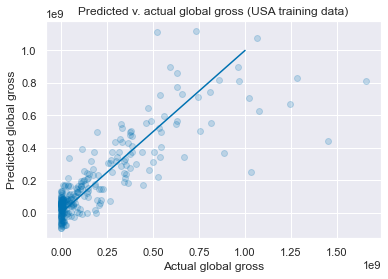

In [110]:
# USA predicted versus actual (training data)
usa_y_train_pred = usa_model.predict(usa_X_train)

plt.scatter(usa_y_train, usa_y_train_pred, alpha=0.2)
plt.xlabel('Actual global gross')
plt.ylabel('Predicted global gross')
plt.title('Predicted v. actual global gross (USA training data)')
plt.plot([0, 1e9], [0, 1e9]);

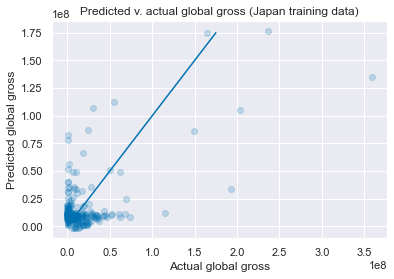

In [114]:
# Japan predicted versus actual (training data)
japan_y_train_pred = japan_model.predict(japan_X_train)

plt.scatter(japan_y_train, japan_y_train_pred, alpha=0.2)
plt.xlabel('Actual global gross')
plt.ylabel('Predicted global gross')
plt.title('Predicted v. actual global gross (Japan training data)')
plt.plot([0, 1.75e8], [0, 1.75e8]);